<a href="https://colab.research.google.com/github/mmalinda/DS-Core/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2019_12_MMalinda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS-Core Week 2 IP - Exploratory Data Analysis

# Defining the Question


## The Question
How can we predict which individuals are most likely to have or use a bank acocunt?

## Metrics for Success
* Visualising the current state of financial inclusion in the different countries
* Identifying demographic factors that influence financial outcomes for individuals in Kenya, Rwanda, Tanzania, and Uganda.

## Context
Financial inclusion is essential for addressing global economic challenges as access to financial services helps to improve an individual's quality of life by helping them to conduct transactions, save money, invest in assets and businesses, and manage and plan for recurring or unexpected expenses. Fincancial inclusion has been identified as a key to the achievement of several United Nations Sustainable Development Goals (SDGs). Information on factors influencing the use of financial services helps governments plan and develop policies to help improve access to financial services and track the effects of existing policies. The data also helps governments to track their progress towards achieving development goals. 




## Experimental Design
The research tool used was a questionnaire designed and reviewed by FinScope and local partner institutions that looks into how adults
(16 years of age and above) manage their money and the extent to which
they use financial services. The answers to questions in the questionnaire will provides data that can be used to develop a demographic profile for each respondent.

The population was stratified and randomised on multiple levels to ensure that the sample is representative on a national and regional level and between rural and urban populations.

  

## Data Relevance
The objectives of data collection are aligned with the question for this analysis.

# Reading the Data

In [0]:
# Importing Libraries
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [0]:
# Loading the data
df = pd.read_csv('http://bit.ly/FinancialDataset')

# Checking the Data

In [0]:
# Previewing the top of the dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Previewing the bottom of the dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [0]:
# Determining the number of records and data types in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [0]:
# Describing the data
df.describe(include = 'all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1845,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


# External Data Source Validation

# Tidying the Dataset

In [0]:
# Identifying any missing data
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

These are not many missing values compared to the total, so we will drop the missing values

In [0]:
# Dropping rows with missing data
df = df.dropna()

In [0]:
# Confirming that the missing values were dropped
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [0]:
# Checking for duplicates
df.duplicated().sum()

0

In [0]:
# Standardising column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [0]:
# Viewing new column names
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [0]:
# Correcting column names
df.rename(columns = {'has_a_bank_account':'bank_account', 'gender_of_respondent':'gender', 'the_relathip_with_head':'relationship_with_head' }, inplace = True)
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age', 'gender',
       'relationship_with_head', 'marital_status', 'level_of_educuation',
       'type_of_job'],
      dtype='object')

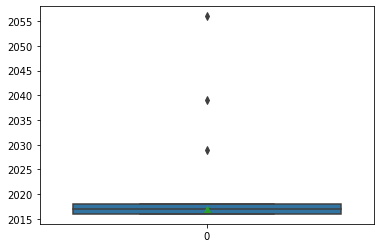

In [0]:
#Checking for outliers by year
sns.boxplot(data=df['year'], showmeans = True)

The year cannot be after 2018 as that was the last year for data collection.

In [0]:
# Deleting the outliers
df.drop(df[df.year > 2019].index, inplace=True)

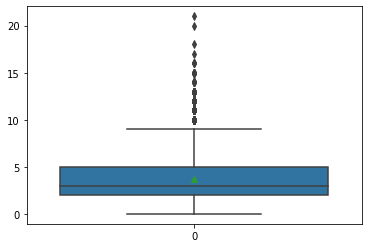

In [0]:
# Checking for outliers by household size 
sns.boxplot(data=df['household_size'], showmeans = True)

In [0]:
# Checking the maximum value
df['household_size'].max()

21.0

Up to 21 members is a reasonable household size, and the mean, median and IQR do not seem to be affected by outliers.

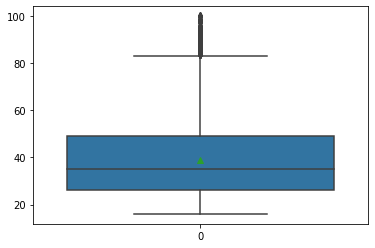

In [0]:
# Checking for outliers by age
sns.boxplot(data=df['respondent_age'], showmeans = True)

In [0]:
# Looking at the distribution of respondents over 80 years old
df[df['respondent_age'] > 80].respondent_age.value_counts()

85.0     55
82.0     40
83.0     33
90.0     28
86.0     25
81.0     24
88.0     24
84.0     20
95.0     18
89.0     16
87.0     15
92.0      7
98.0      6
94.0      5
91.0      5
100.0     5
93.0      4
96.0      3
99.0      2
97.0      1
Name: respondent_age, dtype: int64

There are generally fewer respondents over 90 years of age, so I would not remove the outliers here

# Exploratory Analysis

## Univariate Analysis

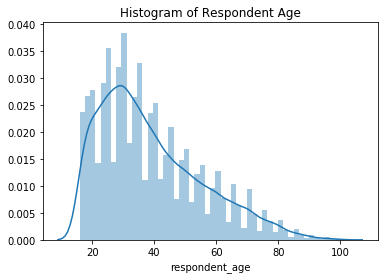

In [0]:
# Plotting a histogram of respondent ages
sns.distplot(df.respondent_age, kde=True)
plt.title('Histogram of Respondent Age')
plt.show();

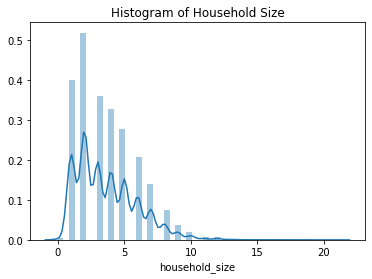

In [77]:
# Plotting a histogram of household sizes
sns.distplot(df.household_size, kde=True)
plt.title('Histogram of Household Size')
plt.show();

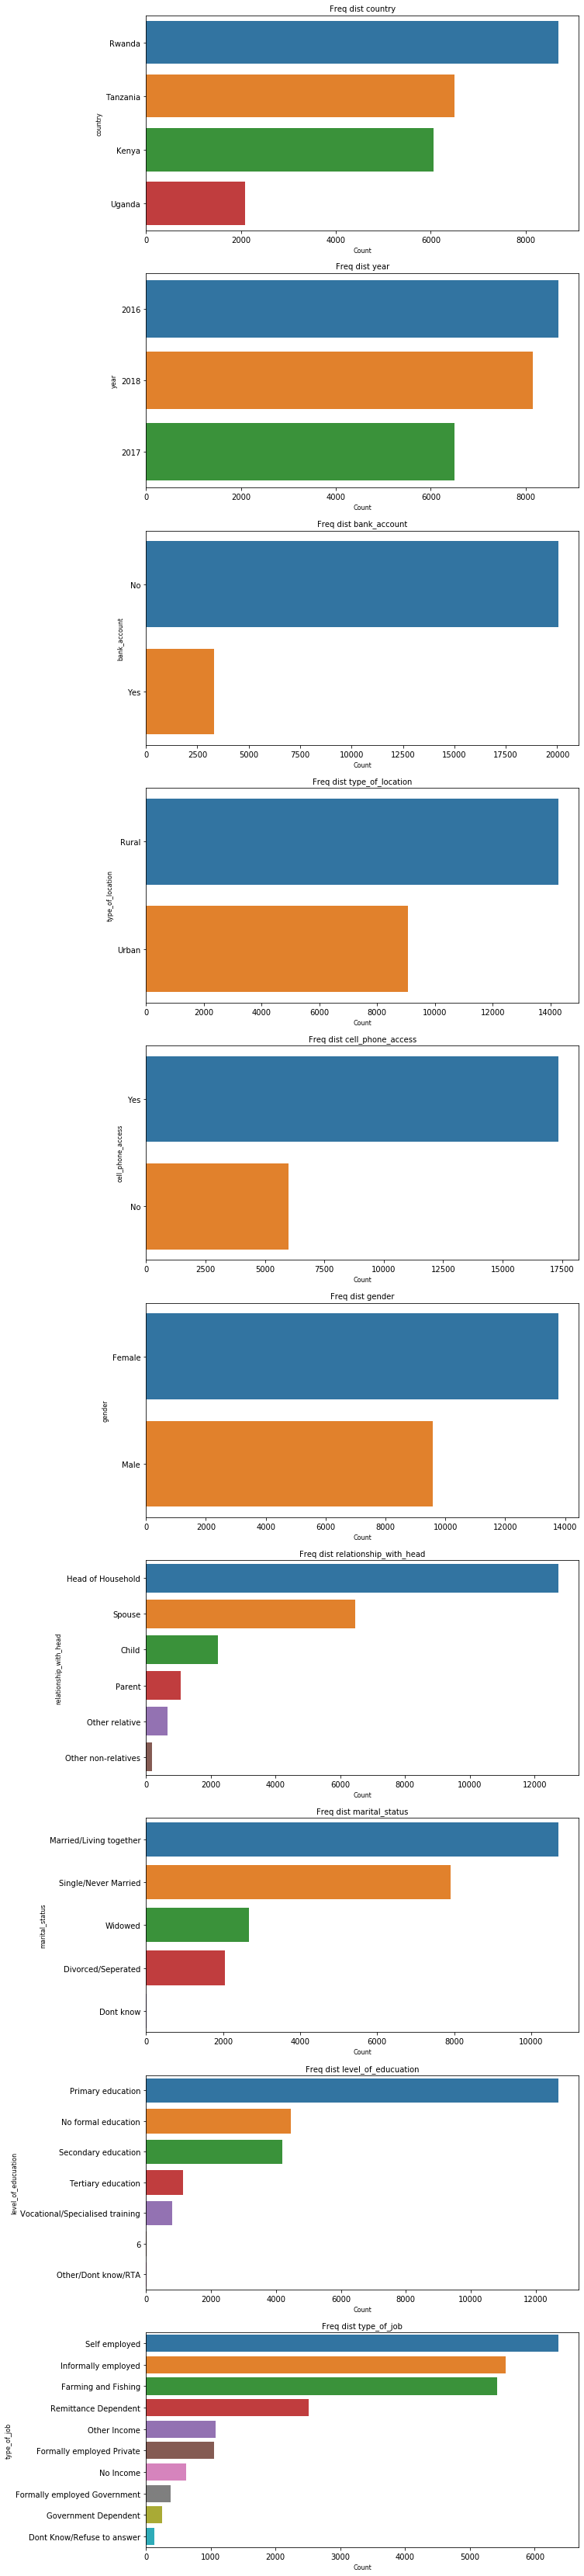

In [80]:
# Plotting count plots for categorical variables
col_names = ['country', 'year', 'bank_account', 'type_of_location',
       'cell_phone_access', 'gender',
       'relationship_with_head', 'marital_status', 'level_of_educuation',
       'type_of_job']

fig, ax = plt.subplots(len(col_names), figsize=(10, 60))

for i, col_val in enumerate(col_names):
        
    sns.countplot(y = df[col_val], order = df[col_val].value_counts().index, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_ylabel(col_val, fontsize=8)
    ax[i].set_xlabel('Count', fontsize=8)


In [88]:
# Calculating measures of central tendency and dispersion for numerical variables
col_names = [ 'household_size', 'respondent_age']

for i, col_val in enumerate(col_names):
  print(col_val)
  print("Mean:", df[col_val].mean())
  print("Median:", df[col_val].median())
  print("Mode:", df[col_val].mode())
  print("SD:", df[col_val].std())
  print("Variance:", df[col_val].var())
  col_val_max = df[col_val].max()
  col_val_min = df[col_val].min()
  print("Range:", col_val_max - col_val_min)
  print("Quartiles:", df[col_val].quantile([0.25,0.5,0.75]))
  print("Skewness:", df[col_val].skew())
  print("Kurtosis:", df[col_val].kurt())
  print("\n")

household_size
Mean: 3.688560411311054
Median: 3.0
Mode: 0    2.0
dtype: float64
SD: 2.2812745975350435
Variance: 5.204213789358675
Range: 21.0
Quartiles: 0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64
Skewness: 0.9741827150450616
Kurtosis: 1.1538357462528523


respondent_age
Mean: 38.80706940874036
Median: 35.0
Mode: 0    30.0
dtype: float64
SD: 16.519904564514412
Variance: 272.90724682066417
Range: 84.0
Quartiles: 0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64
Skewness: 0.8406145812311228
Kurtosis: 0.09826807013177241




### Univariate Summary
Most of the respondents in the survey were younger (the age data is left-skewed). The household size was also left-skewed and most households had under 5 individuals. Both numerical variables had a large range and high variability. The country with the most respondents in this survey is Rwanda and the year where the most data was collected was 2016.
The majority of respondents do not have a bank account. Most respondents live in rural areas. Over half of the respondents have access to a cellphone. The majority of respondents were female. Most of the respondents are the head of their households. Most of the respondents were married/living with a partner. The level of education for most respondents was below secondary education. Most of the respondents were self employed, informally employed or fishing/farming.

## Bivariate Analysis

bank_account    No   Yes
country                 
Kenya         4543  1519
Rwanda        7686   997
Tanzania      5901   599
Uganda        1914   181


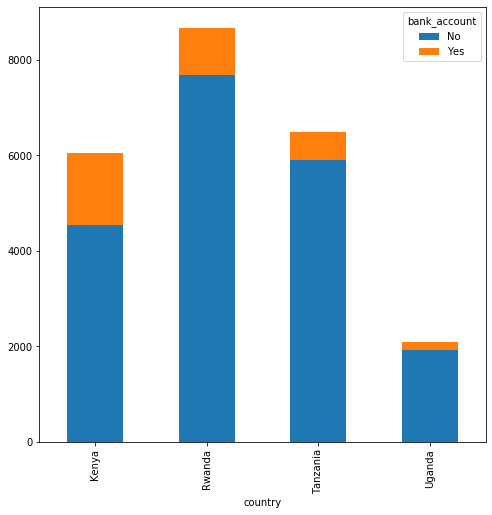

In [143]:
# Finding relationship between country and access to financial services
df_country_table = pd.crosstab(index=df["country"], 
                          columns=df["bank_account"])
print(df_country_table)
df_country_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

cell_phone_access    No    Yes
bank_account                  
No                 5905  14139
Yes                 104   3192


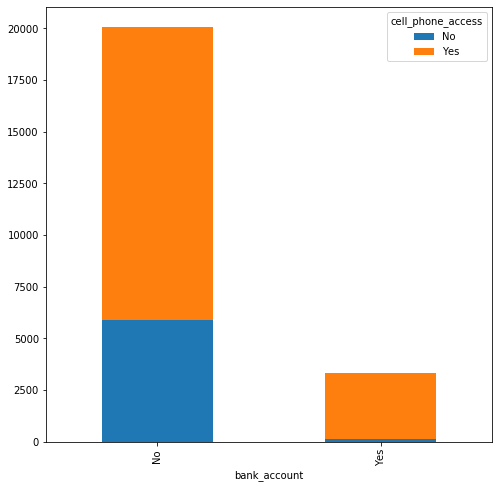

In [142]:
# Finding relationship between cell phone access and access to financial services
df_cell_table = pd.crosstab(index=df['bank_account'], 
                          columns=df['cell_phone_access'])
print(df_cell_table)
df_cell_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

bank_account     No   Yes
gender                   
Female        12286  1480
Male           7758  1816


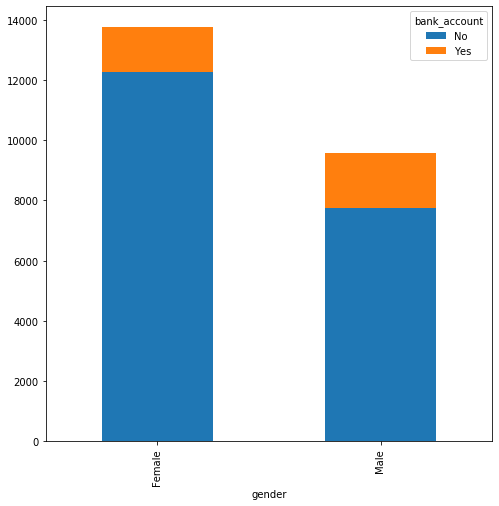

In [141]:
# Finding relationship between gender and access to financial services
df_gender_table = pd.crosstab(index=df["gender"], 
                          columns=df["bank_account"])
print(df_gender_table)
df_gender_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

bank_account               No   Yes
marital_status                     
Divorced/Seperated       1817   232
Dont know                   6     2
Married/Living together  8838  1860
Single/Never Married     6943   959
Widowed                  2440   243


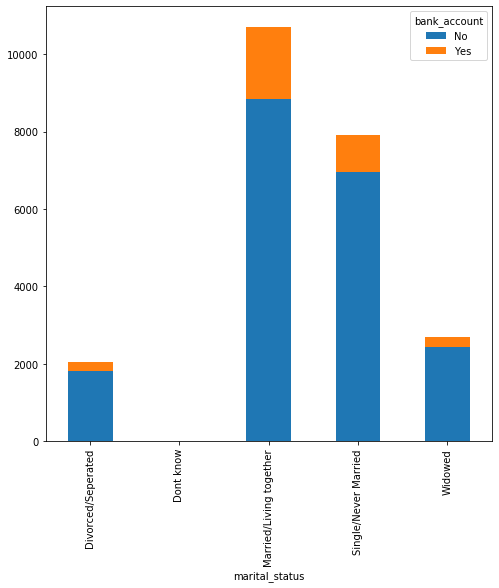

In [140]:
# Finding relationship between marital status and access to financial services
df_marital_table = pd.crosstab(index=df['marital_status'], 
                          columns=df["bank_account"])
print(df_marital_table)
df_marital_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

bank_account                        No   Yes
level_of_educuation                         
6                                   22     5
No formal education               4291   176
Other/Dont know/RTA                  2     6
Primary education                11605  1083
Secondary education               3225   981
Tertiary education                 554   589
Vocational/Specialised training    345   456


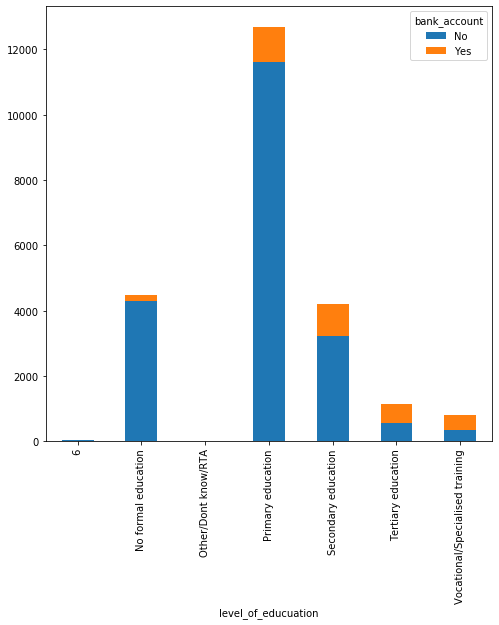

In [145]:
# Finding relationship between education level and access to financial services
df_education_table = pd.crosstab(index=df['level_of_educuation'], 
                          columns=df["bank_account"])
print(df_education_table)
df_education_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

bank_account               No   Yes
relationship_with_head             
Child                    2028   193
Head of Household       10471  2258
Other non-relatives       169    20
Other relative            597    65
Parent                   1004    65
Spouse                   5775   695


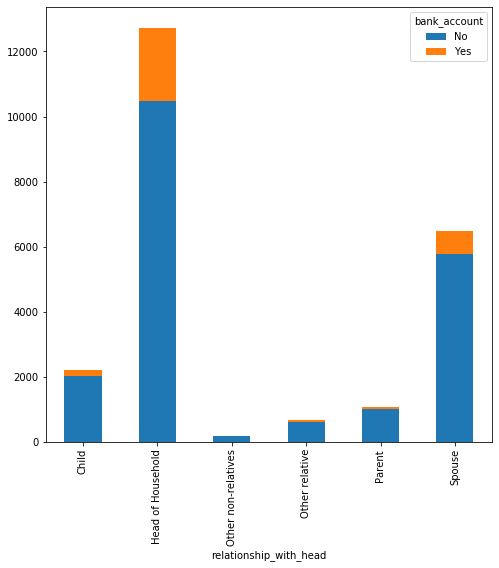

In [146]:
# Finding relationship between relationship to head of household and access to financial services
df_rship_table = pd.crosstab(index=df['relationship_with_head'], 
                          columns=df["bank_account"])
print(df_rship_table)
df_rship_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

bank_account                    No  Yes
type_of_job                            
Dont Know/Refuse to answer     111   14
Farming and Fishing           4788  634
Formally employed Government    87  299
Formally employed Private      481  566
Government Dependent           197   50
Informally employed           5109  440
No Income                      605   13
Other Income                   881  196
Remittance Dependent          2268  240
Self employed                 5517  844


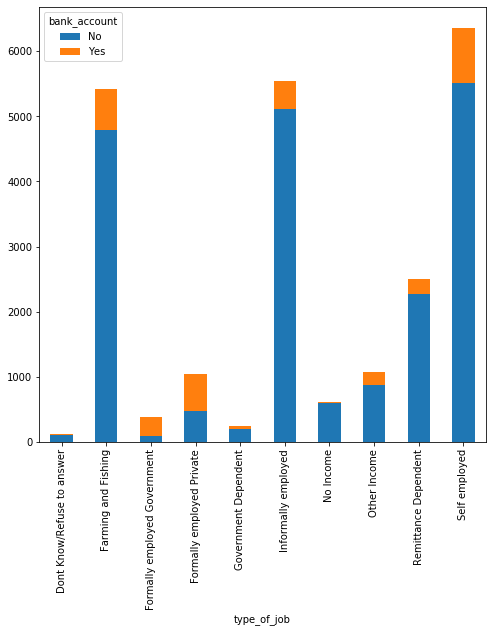

In [148]:
# Finding relationship between type of job and access to financial services
df_job_table = pd.crosstab(index=df['type_of_job'], 
                          columns=df["bank_account"])
print(df_job_table)
df_job_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

bank_account         No   Yes
type_of_location             
Rural             12600  1663
Urban              7444  1633


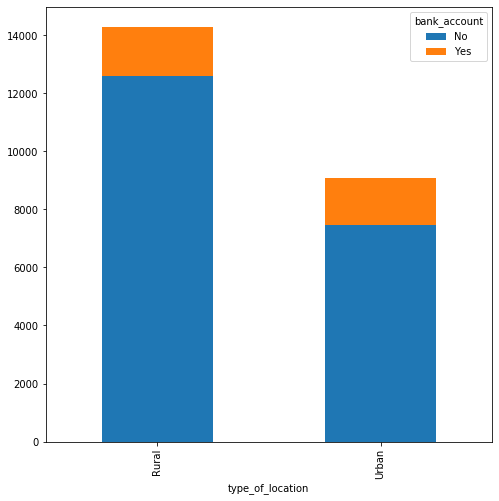

In [152]:
# Finding relationship between marital status and access to financial services
df_location_table = pd.crosstab(index=df['type_of_location'], 
                          columns=df["bank_account"])
print(df_location_table)
df_location_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

bank_account    No   Yes
year                    
2016          7686   997
2017          5901   599
2018          6457  1700


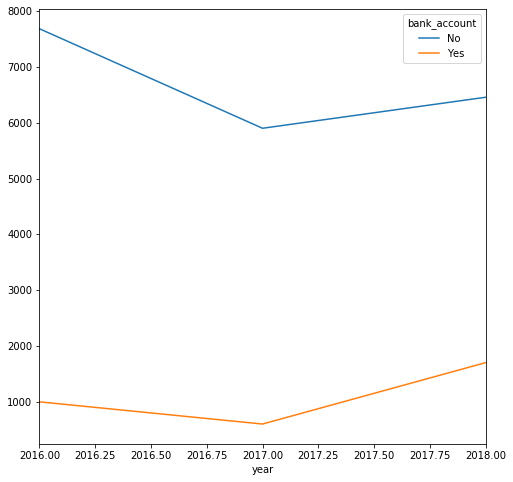

In [151]:
# Observing changes in financial inclusion over time
df_year_table = pd.crosstab(index=df['year'], 
                          columns=df["bank_account"])
print(df_year_table)
df_year_table.plot(kind="line", 
                 figsize=(8,8))

### Recommendations
Financial policies should focus on improving access to financial services for female individuals, unmarried individuals, those with lower levels of formal education, individuals tha are not formally employed, and individuals living in rural areas. 
Many of the participants that so not have a bank account have access to a cellphone, so they should promote the use of mobile banking services.
More people had access to bank accounts in 2018 than in previous years, so any policies that were put in place during that time period may have helped improve the state of financial inclusion in these countries. 
Companies offering financial services in these countries should focus on improving access to their services in Tanzania and Uganda, and the Tanzanian and Ugandan financial policies should be reviewed to encourage increased access to financial services.

## Multivariate Analysis

In [0]:
# Separating the dataset into features and 
X = df.iloc[:, 6:8].values
y = df.iloc[:, 3].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


In [120]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[4036    0]
 [ 632    0]]
Accuracy0.8646101113967438
